In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

top-left         0
top-middle       0
top-right        0
middle-left      0
middle-middle    0
middle-right     0
bottom-left      0
bottom-middle    0
bottom-right     0
class            0
dtype: int64


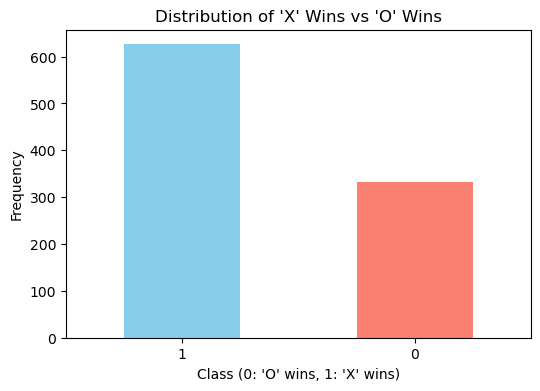

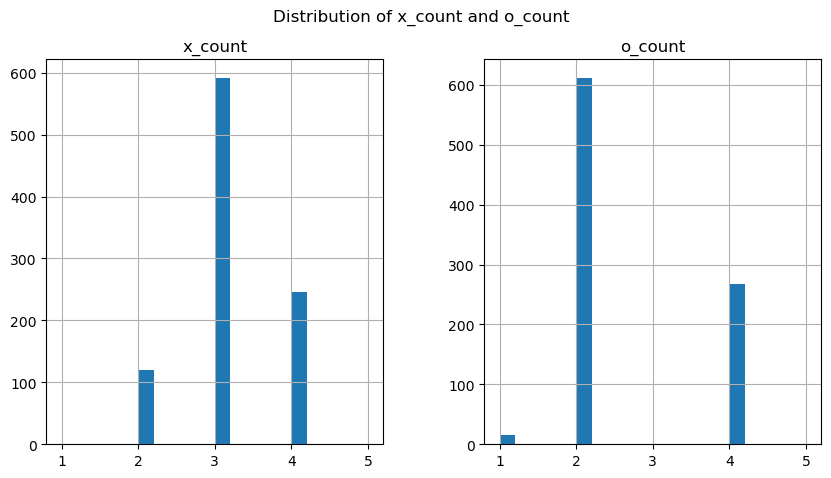

          x_count     o_count
count  958.000000  958.000000
mean     3.131524    2.413361
std      0.604259    1.106790
min      2.000000    0.000000
25%      3.000000    2.000000
50%      3.000000    2.000000
75%      4.000000    4.000000
max      4.000000    4.000000


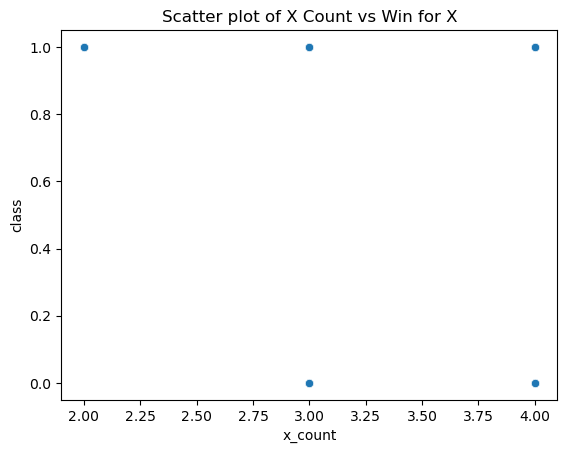

Feature Matrix
[['x' 'x' 'x' ... 'x' 'o' 'o']
 ['x' 'x' 'x' ... 'o' 'x' 'o']
 ['x' 'x' 'x' ... 'o' 'o' 'x']
 ...
 ['o' 'x' 'o' ... 'x' 'o' 'x']
 ['o' 'x' 'o' ... 'x' 'o' 'x']
 ['o' 'o' 'x' ... 'o' 'x' 'x']]
Target Vector
['positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positiv

In [2]:
# Task 1: Dataset Selection and Preprocessing (20 Marks)

# Task requirements:
# - Choose a dataset from the UCI Machine Learning Repository.
# - Discuss the real-world significance of the problem the dataset addresses 
#   and why Neural Networks (NN) are suitable for solving it.
# - Use visualizations (e.g., histograms, scatter plots) to explore feature distributions.
# - Identify data types for each feature (numeric, categorical, etc.) and provide statistics 
#   (mean, median, std) for numeric features.
# - Handle missing values (e.g., remove or impute missing data).
# - Document all dataset selection and preprocessing steps in the report.

# Task overview:
# This task involves selecting and analyzing a dataset from the UCI repository, 
# explaining its real-world application, and justifying the use of a Neural Network.
# Data preprocessing includes visualizing data, handling missing values, and identifying 
# data types and statistics, with all steps documented in a report.


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
columns = ['top-left', 'top-middle', 'top-right', 'middle-left', 'middle-middle', 'middle-right', 'bottom-left', 'bottom-middle', 'bottom-right', 'class']
dataset = pd.read_csv(url,names=columns)

# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

# Remove rows with any missing values
dataset_cleaned = dataset.dropna()

X = dataset_cleaned.iloc[:, :-1].values
y = dataset_cleaned.iloc[:, -1].values

for column in dataset.columns:
    dataset[column] = pd.Categorical(dataset[column]).codes
    
plt.figure(figsize=(6, 4))
dataset['class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of 'X' Wins vs 'O' Wins")
plt.xlabel("Class (0: 'O' wins, 1: 'X' wins)")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# Create x_count and o_count based on the board columns
dataset['x_count'] = dataset.iloc[:, :-1].apply(lambda row: (row == 1).sum(), axis=1)  # Count 'x' (coded as 1)
dataset['o_count'] = dataset.iloc[:, :-1].apply(lambda row: (row == 0).sum(), axis=1)  # Count 'o' (coded as 0)

# Plot histograms for x_count and o_count
dataset[['x_count', 'o_count']].hist(bins=20, figsize=(10, 5), range=(1, 5))
plt.suptitle('Distribution of x_count and o_count')
plt.show()

# Describe numeric features
print(dataset[['x_count', 'o_count']].describe())

# Scatter plot to see relation between 'x_count' and 'class' (win_for_x)
sns.scatterplot(x='x_count', y='class', data=dataset)
plt.title("Scatter plot of X Count vs Win for X")
plt.show()

print("Feature Matrix")
print(X)

print("Target Vector")
print(y)

# Encoding categorical data

# Encoding the Independent Variable
df = pd.DataFrame(X)
for column in df.columns:
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
X = df.values.astype(int)

print("Encoding the Independent Variable")
print(X)

# Encoding the Dependent Variable
y = np.array([1 if value == 'positive' else 0 for value in y])

print("Encoding the Dependent Variable")
print(y)

# Splitting the dataset into the Training set, Validation set and Test set
# Shuffle the data
indices = np.arange(X.shape[0])
np.random.seed(7)
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Split the data
train_size = int(0.7 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Print the lengths of the datasets and values
print("Training Set")
print(len(X_train))
print(X_train)
print(y_train)

print("Validation Set")
print(len(X_val))
print(X_val)
print(y_val)

print("Test Set")
print(len(X_test))
print(X_test)
print(y_test)

In [ ]:
# # Task 2: Update NN weights using Genetic Algorithm (55 Marks)

# # Task requirements:
# # 1. **Network Architecture**: Build a neural network with [N, 10, 1] structure 
# #    (N input neurons, 10 hidden neurons, 1 output neuron for binary classification).
# # 2. **Data Split**: Split dataset into:
# #    - 70% for training (T), 20% for validation (V), 10% for testing (S).
# # 3. **Batching**: Divide the data into batches of 100 samples.
# # 4. **Training**: Train the NN for at least 10 epochs.
# # 5. **Genetic Algorithm (GA)**: Implement GA to optimize weights and biases:
# #    - Each individual represents a complete set of weights and biases.
# #    - Fitness function evaluates NN performance on the validation set.
# # 6. **Testing Function**: Implement a function to calculate error between predicted and target outputs.
# # 7. **Error Function**: Implement an error function to compute the error vector and aggregated error.
# # 8. **GA Pass**: Apply GA after each batch iteration.
# # 9. **Validation**: Perform validation after each epoch.
# # 10. **Testing**: Perform testing once after training completes.
# # 11. **Reporting**: Report training, validation, and testing accuracies with tables, graphs, and charts.
# # 12. **OOP and Matrix Notation**: Use object-oriented programming and/or matrix notation to structure and implement the network.

# # Task overview:
# # In this task, you'll build a neural network with a specified architecture and use 
# # Genetic Algorithm (GA) to optimize its weights and biases. The dataset will be split into 
# # training, validation, and testing sets. The model will be trained, validated, and tested, 
# # with performance reported using various metrics. Object-oriented programming and matrix notation 
# # are required for structuring the code.


# # Initialization
# epochs = 100
# hidden_layer_size = 10

# network = np.empty(10, dtype=dict)
# for b in range(10):    
#     input_hidden_weights = np.random.rand(10, 27) - 0.5
#     hidden_bias_arr = np.random.rand(hidden_layer_size) - 0.5
#     hidden_output_weights = np.random.rand(hidden_layer_size) - 0.5
#     output_bias_arr = np.random.rand(1) - 0.5
#     fitness = 0

#     network[b] = {"input_hidden_weights": input_hidden_weights, "hidden_bias_arr": hidden_bias_arr, "hidden_output_weights": hidden_output_weights, "output_bias_arr": output_bias_arr, "fitness": fitness}

# # Genetic Algorithm
# mutation_rate = 0.1
# crossover_rate = 0.5

# def error_NeuralNinjas(y_batch, predicted_values):
#     error_vector = y_batch - predicted_values
#     error = np.mean(np.abs(error_vector))
#     return error_vector, error

# def fitness(y_batch, predicted_values_arr, network):
#     for i, predicted_values in enumerate(predicted_values_arr):
#         _, error = error_NeuralNinjas(y_batch, predicted_values)
#         network[i]["fitness"] = error

# def selection(network):
#     sorted_entries = sorted(network, key=lambda entry: entry["fitness"], reverse=False) # sorted in ascending order
#     for i in range(5):
#         sorted_entries[i + 5]["input_hidden_weights"] = np.copy(sorted_entries[i]["input_hidden_weights"])
#         sorted_entries[i + 5]["hidden_bias_arr"] = np.copy(sorted_entries[i]["hidden_bias_arr"])
#         sorted_entries[i + 5]["hidden_output_weights"] = np.copy(sorted_entries[i]["hidden_output_weights"])
#         sorted_entries[i + 5]["output_bias_arr"] = np.copy(sorted_entries[i]["output_bias_arr"])
#         sorted_entries[i + 5]["fitness"] = sorted_entries[i]["fitness"]
#     return np.array(sorted_entries)

# def mutate(network):
#     entries_to_mutate = len(network) * mutation_rate
#     for i in range(int(entries_to_mutate)):
#         random_index = np.random.randint(0, len(network))
#         mutate_feature = np.random.randint(0, 4)
#         if mutate_feature == 0:
#             network[random_index]["input_hidden_weights"] = np.random.rand(network[random_index]["input_hidden_weights"].shape[0], network[random_index]["input_hidden_weights"].shape[1]) - 0.5
#         elif mutate_feature == 1:
#             network[random_index]["hidden_bias_arr"] = np.random.rand(network[random_index]["hidden_bias_arr"].shape[0]) - 0.5
#         elif mutate_feature == 2:
#             network[random_index]["hidden_output_weights"] = np.random.rand(network[random_index]["hidden_output_weights"].shape[0]) - 0.5
#         elif mutate_feature == 3:
#             network[random_index]["output_bias_arr"] = np.random.rand(network[random_index]["output_bias_arr"].shape[0]) - 0.5

# def crossover(network):
#     for i in range(int(len(network) * crossover_rate)):
#         random_index = np.random.randint(0, len(network))
#         random_index2 = np.random.randint(0, len(network))
#         crossover_feature = np.random.randint(0, 4)
#         if crossover_feature == 0:
#             temp = network[random_index]["input_hidden_weights"]
#             network[random_index]["input_hidden_weights"] = network[random_index2]["input_hidden_weights"]
#             network[random_index2]["input_hidden_weights"] = temp
#             temp = network[random_index]["hidden_bias_arr"]
#             network[random_index]["hidden_bias_arr"] = network[random_index2]["hidden_bias_arr"]
#             network[random_index2]["hidden_bias_arr"] = temp
#             temp = network[random_index]["hidden_output_weights"]
#             network[random_index]["hidden_output_weights"] = network[random_index2]["hidden_output_weights"]
#             network[random_index2]["hidden_output_weights"] = temp
#             temp = network[random_index]["output_bias_arr"]
#             network[random_index]["output_bias_arr"] = network[random_index2]["output_bias_arr"]
#             network[random_index2]["output_bias_arr"] = temp
#         elif crossover_feature == 1:
#             temp = network[random_index]["hidden_bias_arr"]
#             network[random_index]["hidden_bias_arr"] = network[random_index2]["hidden_bias_arr"]
#             network[random_index2]["hidden_bias_arr"] = temp
#             temp = network[random_index]["hidden_output_weights"]
#             network[random_index]["hidden_output_weights"] = network[random_index2]["hidden_output_weights"]
#             network[random_index2]["hidden_output_weights"] = temp
#             temp = network[random_index]["output_bias_arr"]
#             network[random_index]["output_bias_arr"] = network[random_index2]["output_bias_arr"]
#             network[random_index2]["output_bias_arr"] = temp
#         elif crossover_feature == 2:
#             temp = network[random_index]["hidden_output_weights"]
#             network[random_index]["hidden_output_weights"] = network[random_index2]["hidden_output_weights"]
#             network[random_index2]["hidden_output_weights"] = temp
#             temp = network[random_index]["output_bias_arr"]
#             network[random_index]["output_bias_arr"] = network[random_index2]["output_bias_arr"]
#             network[random_index2]["output_bias_arr"] = temp
#         elif crossover_feature == 3:
#             temp = network[random_index]["output_bias_arr"]
#             network[random_index]["output_bias_arr"] = network[random_index2]["output_bias_arr"]
#             network[random_index2]["output_bias_arr"] = temp

# def GA(y_batch, predicted_values_arr, network):
#     fitness(y_batch, predicted_values_arr, network)
#     selection(network)
#     crossover(network)
#     mutate(network)

# # NN Training
# def create_batches(X, y, batch_size=100):
#     for i in range(0, len(X), batch_size):
#         yield X[i:i + batch_size], y[i:i + batch_size]

# train_batches = list(create_batches(X_train, y_train))

# val_batches = list(create_batches(X_val, y_val))

# test_batches = list(create_batches(X_test, y_test))

# print(f"Number of training batches: {len(train_batches)}")
# print(f"Number of validation batches: {len(val_batches)}")
# print(f"Number of test batches: {len(test_batches)}")

# print("Network before training")
# print(network)

# def activation_function(x):
#     return 1 / (1 + np.exp(-x))

# def test_NeuralNinjas(batch, nn):
#     X_batch, y_batch = batch

#     input_hidden_weights = nn["input_hidden_weights"]
#     hidden_bias_arr = nn["hidden_bias_arr"]
#     hidden_output_weights = nn["hidden_output_weights"]
#     output_bias_arr = nn["output_bias_arr"]

#     predicted_values = np.empty(len(X_batch), dtype=int)
#     for k in range(len(X_batch)):
#         input_layer = X_batch[k]
#         hidden_layer = activation_function(np.dot(input_hidden_weights, input_layer) + hidden_bias_arr)
#         output_layer = activation_function(np.dot(hidden_output_weights, hidden_layer) + output_bias_arr)
#         predicted_values[k] = output_layer.round()

#     error_vector, error = error_NeuralNinjas(y_batch, predicted_values)
        
#     return error_vector, error

# def NN():
#     for i in range(epochs):
#         print("Epoch: " + str(i))
#         for b, batch in enumerate(train_batches):
#             X_batch, y_batch = batch
#             predicted_values_arr = np.empty(hidden_layer_size, dtype=object)
#             for j in range(10): # population size
#                 input_hidden_weights = network[j]["input_hidden_weights"]
#                 hidden_bias_arr = network[j]["hidden_bias_arr"]
#                 hidden_output_weights = network[j]["hidden_output_weights"]
#                 output_bias_arr = network[j]["output_bias_arr"]

#                 predicted_values = np.empty(len(X_batch), dtype=int)
#                 for k in range(len(X_batch)):
#                     input_layer = X_batch[k]
#                     hidden_layer = activation_function(np.dot(input_hidden_weights, input_layer) + hidden_bias_arr)
#                     output_layer = activation_function(np.dot(hidden_output_weights, hidden_layer) + output_bias_arr)
#                     predicted_values[k] = output_layer.round()
                    
#                 predicted_values_arr[j] = predicted_values

#             GA(y_batch, predicted_values_arr, network)

#             error_vector_arr = np.empty(10, dtype=object)
#             error_arr = np.empty(10, dtype=float)
#             for j in range(10):
#                 error_vector_arr[j], error_arr[j] = test_NeuralNinjas(batch, network[j])

#             print("Validating batch: " + str(b))
#             print("Error vector: " + str(error_vector_arr))
#             print("Error: " + str(error_arr))
#             for _, error in enumerate(error_arr):
#                 print("Accuracy: " + str((1 - error) * 100) + "%")
#             print()
#             print()
    
# NN()

# print("Network after training")
# print(network)

# for b, batch in enumerate(test_batches):
#     error_vector_arr = np.empty(hidden_layer_size, dtype=object)
#     error_arr = np.empty(hidden_layer_size, dtype=float)
#     for i, nn in enumerate(network):
#         error_vector_arr[i], error_arr[i] = test_NeuralNinjas(batch, nn)

#     print("Testing batch: " + str(b))
#     print("Error vector: " + str(error_vector_arr))
#     print("Error: " + str(error_arr))
#     for _, error in enumerate(error_arr):
#         print("Accuracy: " + str((1 - error) * 100) + "%")
#     print()
#     print()

Number of training batches: 7
Number of validation batches: 2
Number of test batches: 1
Network before training
[{'input_hidden_weights': array([[ 0.3644739 ,  0.11929476,  0.43088028, -0.35207771, -0.16696235,
        -0.26404466,  0.07598284,  0.16396379,  0.05229867, -0.1515367 ],
       [-0.18338162, -0.36137045,  0.38592124,  0.40507288, -0.34494656,
         0.24199566,  0.47461032, -0.19614991, -0.44456915, -0.49493103],
       [ 0.16515898, -0.17267431,  0.39835478,  0.10106056, -0.22688848,
         0.45800469,  0.49694269,  0.01640812,  0.29206353,  0.38403129],
       [-0.07363241,  0.47710136, -0.23678196,  0.18684828,  0.33569234,
        -0.00605548, -0.06569085, -0.34296037, -0.45872026, -0.15616864],
       [ 0.08631721, -0.419389  ,  0.25425428,  0.31118928,  0.36090208,
         0.0312349 , -0.18276369,  0.2656009 ,  0.49728613,  0.12281646],
       [-0.4726497 , -0.38789458, -0.38738981,  0.11390363, -0.24973629,
        -0.41580576,  0.37835026,  0.43611462, -0.2500

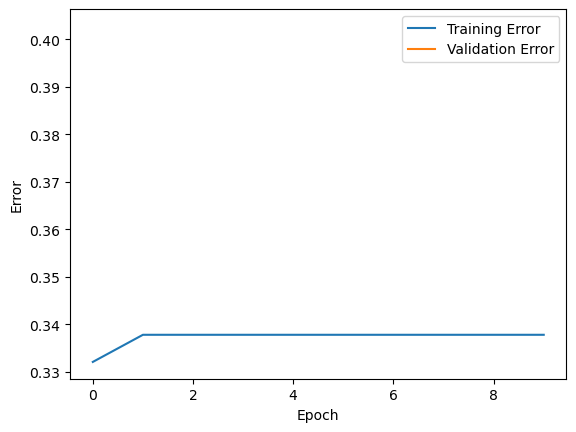

Final Testing Accuracy: 71.13%
Network after training
[{'input_hidden_weights': array([[ 0.36563144,  0.13952345,  0.42365941, -0.33562348, -0.15916385,
        -0.24856839,  0.07624442,  0.14738462,  0.0585783 , -0.1517603 ],
       [-0.1858844 , -0.40394683,  0.40480314,  0.36340655, -0.38721874,
         0.20416342,  0.47368745, -0.15010023, -0.45625982, -0.49480182],
       [ 0.16862809, -0.13745447,  0.38241033,  0.13994503, -0.20419747,
         0.48440277,  0.49852759, -0.01462238,  0.30332778,  0.38431629],
       [-0.07338487,  0.47471419, -0.23644452,  0.18634422,  0.32568777,
        -0.00718195, -0.0655749 , -0.33422871, -0.45803022, -0.15602108],
       [ 0.08870574, -0.39705859,  0.24550457,  0.33006762,  0.36612373,
         0.04261988, -0.18162539,  0.24672227,  0.50411426,  0.12294841],
       [-0.47316191, -0.39496567, -0.38326098,  0.10920172, -0.25673604,
        -0.42202216,  0.37801961,  0.4447016 , -0.25175483, -0.33055532],
       [ 0.40441305, -0.28561865, -0.0

In [7]:
# Task 3: Update NN weights using Backpropagation (30 Marks)
# Task requirements:
# 1. **Network Architecture**: Build a neural network with [N, 10, 1] structure 
#    (N input neurons, 10 hidden neurons, 1 output neuron for binary classification).
# 2. **Data Split**: Split dataset into:
#    - 70% for training (T), 20% for validation (V), 10% for testing (S).
# 3. **Batching**: Divide the data into batches of 100 samples.
# 4. **Training**: Train the NN for at least 10 epochs.
# 5. ** Task 3 in which back propagation was used.
# 6. **Testing Function**: Implement a function to calculate error between predicted and target outputs.
# 7. **Error Function**: Implement an error function to compute the error vector and aggregated error.
# 9. **Validation**: Perform validation after each epoch.
# 10. **Testing**: Perform testing once after training completes.
# 11. **Reporting**: Report training, validation, and testing accuracies with tables, graphs, and charts.
# 12. **OOP and Matrix Notation**: Use object-oriented programming and/or matrix notation to structure and implement the network.

#Task 3: Implement the backpropagation algorithm to train the network. The function
#applies one training epoch only. The inputs are the labeled training partition of the data: T , the matrix of the network weights, and the batch size.
#It returns the matrix of the network weights.
#Define the training function as “Weights_Matrix = train_[Teamname](Labeled_Input_Matrix, Weights_Matrix, BatchSize)”
#For this function, you may need two subroutines, one to perform the forward pass of the inputs through the network layers. 
#The second one to perform the backward pass to propagate the error from the output layer back to the input layer and to update the network weights.




# Initialization
global TestArray
TestArray = []

global validationArrays
validationArrays = []

global errorArray
errorArray = []
hidden_layer_size = 10
network = []
for _ in range(10):  
    network.append({
        "input_hidden_weights": np.random.rand(27, 10) - 0.5,  # Shape (27, 10) 27 Neurons input
        "hidden_bias_arr": np.random.rand(1, 10) - 0.5,
        "hidden_output_weights": np.random.rand(10, 1) - 0.5,  # Shape (10, 1)
        "output_bias_arr": np.random.rand(1, 1) - 0.5
    })
    



def error_NeuralNinjas(y_batch, predicted_values): #task 2 step 7
    error_vector = y_batch - predicted_values
    error = np.mean(np.abs(error_vector))
    return error_vector, error


# NN Training
def create_batches(X, y, batch_size=100):
    for i in range(0, len(X), batch_size):
        yield X[i:i + batch_size], y[i:i + batch_size]

train_batches = list(create_batches(X_train, y_train))

val_batches = list(create_batches(X_val, y_val))

test_batches = list(create_batches(X_test, y_test))

print(f"Number of training batches: {len(train_batches)}")
print(f"Number of validation batches: {len(val_batches)}")
print(f"Number of test batches: {len(test_batches)}")

print("Network before training")
print(network)

def activation_function(x):
    return 1 / (1 + np.exp(-x))
    
def derivative_for_sigmoid(y): #for back-propagation
    return y * (1 - y)
    
def test_NeuralNinjas(batch, nn): #task 2, step 6
    X_batch, y_batch = batch

    input_hidden_weights = nn["input_hidden_weights"]
    hidden_bias_arr = nn["hidden_bias_arr"]
    hidden_output_weights = nn["hidden_output_weights"]
    output_bias_arr = nn["output_bias_arr"]

    predicted_values = np.empty(len(X_batch), dtype=int)
    for k in range(len(X_batch)):
        input_layer = X_batch[k].reshape(1,-1)
        hidden_layer = activation_function(np.dot(input_layer,input_hidden_weights, ) + hidden_bias_arr)
        output_layer = activation_function(np.dot(hidden_layer,hidden_output_weights) + output_bias_arr)
        predicted_values[k] = np.round(output_layer[0, 0])

    error_vector, error = error_NeuralNinjas(y_batch, predicted_values)
        
    return error_vector, error
def train_NeuralNinjas(Labeled_Input_Matrix, Weights_Matrix, BatchSize):
    return train_NeuralNinja(Labeled_Input_Matrix, Weights_Matrix, BatchSize, learning_rate=0.01)
def forwardPass(Xbatch, Weights_Matrix):
    input_hidden_weights = Weights_Matrix["input_hidden_weights"]
    hidden_biases = Weights_Matrix["hidden_bias_arr"]
    hidden_output_weights = Weights_Matrix["hidden_output_weights"]
    output_biases = Weights_Matrix["output_bias_arr"]
    
    hidden_layer_input = np.dot(Xbatch, input_hidden_weights) + hidden_biases
    hidden_layer_output = activation_function(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, hidden_output_weights) + output_biases
    output_layer_output = activation_function(output_layer_input)
    return hidden_layer_output, output_layer_output


def backwardPass(X_batch, y_batch, hidden_layer_output, output_layer_output, Weights_Matrix, start, learning_rate):
    error = y_batch - output_layer_output
    output_gradient = error * derivative_for_sigmoid(output_layer_output)

    # Update hidden to output weights
    Weights_Matrix["hidden_output_weights"] += learning_rate * np.dot(hidden_layer_output.T, output_gradient)

    # Update output biases
    output_bias_update = learning_rate * np.sum(output_gradient, axis=0, keepdims=True)
    Weights_Matrix["output_bias_arr"] += output_bias_update.reshape(Weights_Matrix["output_bias_arr"].shape)

    # Calculate hidden errors for input-hidden weight updates
    hidden_error = np.dot(output_gradient, Weights_Matrix["hidden_output_weights"].T) * derivative_for_sigmoid(hidden_layer_output)
    Weights_Matrix["input_hidden_weights"] += learning_rate * np.dot(X_batch.T, hidden_error)
    Weights_Matrix["hidden_bias_arr"] += learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

    return Weights_Matrix

def train_NeuralNinja(Labeled_Input_Matrix, Weights_Matrix, BatchSize, learning_rate):
    predicted_values_Array = [] 
    for start in range(0, Labeled_Input_Matrix.shape[0], BatchSize):
        end = start + BatchSize
        batch = Labeled_Input_Matrix[start:end]
        X_batch = batch[:, :-1]  #extract all columns without last one
        y_batch = batch[:, -1].reshape(-1, 1) #extracts ast column of each row

        input_hidden_weights = Weights_Matrix["input_hidden_weights"]
        hidden_biases = Weights_Matrix["hidden_bias_arr"]
        hidden_output_weights = Weights_Matrix["hidden_output_weights"]
        output_biases = Weights_Matrix["output_bias_arr"]

        # Forward pass
        hidden_layer_output, output_layer_output = forwardPass(X_batch, Weights_Matrix)

        # Backward pass
        Weights_Matrix = backwardPass(X_batch, y_batch, hidden_layer_output, output_layer_output, Weights_Matrix, start, learning_rate)

        #print(f"Input-Hidden Weights Change Mean = {np.mean(input_hidden_weights - prev_input_hidden_weights)}")
        #print(f"Hidden-Output Weights Change Mean = {np.mean(hidden_output_weights - prev_hidden_output_weights)}")

        
        # Weights_Matrix["input_hidden_weights"] = input_hidden_weights
        # Weights_Matrix["hidden_bias_arr"] = hidden_biases
        # Weights_Matrix["hidden_output_weights"] = hidden_output_weights
        # Weights_Matrix["output_bias_arr"] = output_biases

        # predicted_values_Array.append(output_layer_output)

        # Perform GA operations after each batch
        # GA(y_batch, predicted_values_Array, network)

        # predicted_values_Array = []


    return Weights_Matrix


def trainWhileCalculatingErrors(training_errors):
    epoch_training_error = 0
    for b, (X_batch, y_batch) in range(train_batches):
        Labeled_Input_Matrix = np.hstack((X_batch, y_batch.reshape(-1, 1))) #column wise table
        
        for i in range(len(network)): #train each network backpropagation
            network[i] = train_NeuralNinjas(Labeled_Input_Matrix, network[i], BatchSize)
            
        _, batch_error = test_NeuralNinjas((X_batch, y_batch), network[0])
        epoch_training_error += batch_error
        
        # Average training error for the epoch
        avg_training_error = epoch_training_error / len(train_batches)
        training_errors.append(avg_training_error)
        errorArray.append(avg_training_error)

        print(f"Training Error for epoch 1: {avg_training_error:.4f}")  # Print training error
       

def calculate_validation_errors(validation_errors):
    val_errors = []
    for X_val_batch, y_val_batch in val_batches:
        _, val_error = test_NeuralNinjas((X_val_batch, y_val_batch), network[0])
        val_errors.append(val_error)

    avg_val_error = np.mean(val_errors) 
    validation_errors.append(avg_val_error)
    validationArrays.append(avg_val_error)
    print(f"Validation Error for this epoch: {avg_val_error:.4f}")

def calculate_test_accuracy(test_accuracies):
    correct_predictions = 0
    total_predictions = 0
    for b, (X_test_batch, y_test_batch) in enumerate (test_batches):
        final_predictions = perform_network_aggregation(X_test_batch,y_test_batch)
        correct_predictions += np.sum(final_predictions == y_test_batch.squeeze())
        total_predictions += len(y_test_batch)

    accuracy = (correct_predictions / total_predictions) * 100
    test_accuracies.append(accuracy)
    TestArray.append(accuracy)
    print(f"Testing Accuracy: {accuracy:.2f}%")

def perform_network_aggregation(X_test_batch,y_test_batch):
    aggregated_predictions = np.zeros_like(y_test_batch, dtype=float)
    for nn in network:
        hidden_layer, output_layer = forward_pass(nn, X_test_batch)
        aggregated_predictions += output_layer.squeeze()

    aggregated_predictions /= len(network)
    final_predictions = np.round(aggregated_predictions)
    return final_predictions

def forward_pass(nn, X_test_batch):
    input_hidden_weights = nn["input_hidden_weights"]
    hidden_bias_arr = nn["hidden_bias_arr"]
    hidden_output_weights = nn["hidden_output_weights"]
    output_bias_arr = nn["output_bias_arr"]

    hidden_layer = activation_function(np.dot(X_test_batch, input_hidden_weights) + hidden_bias_arr)
    output_layer = activation_function(np.dot(hidden_layer, hidden_output_weights) + output_bias_arr)
    return hidden_layer, output_layer



def NN_Backpropagation():
    global network, train_batches, val_batches
    epochs = 10
    training_errors = []
    validation_errors = []
    test_accuracies = [] 
    for epoch in range(epochs):
       print(f"Epoch {epoch + 1}/{epochs}")
    # print("epoch ",epoch)
       epoch_training_error = 0
       for b, (X_batch, y_batch) in enumerate(train_batches):
         Labeled_Input_Matrix = np.hstack((X_batch, y_batch.reshape(-1, 1)))
         for i in range(len(network)):
             network[i] = train_NeuralNinjas(Labeled_Input_Matrix, network[i], BatchSize)
         _, batch_error = test_NeuralNinjas((X_batch, y_batch), network[0])
         epoch_training_error += batch_error
    # Average training error for the epoch
       avg_training_error = epoch_training_error / len(train_batches)
       training_errors.append(avg_training_error)
       errorArray.append(avg_training_error)

    print(f"Training Error for Epoch {epoch + 1}: {avg_training_error:.4f}")  
    # Validation error
    calculate_validation_errors(validation_errors)
     # Testing Phase (Compute Accuracy for Each Epoch)
    calculate_test_accuracy(test_accuracies)

 

    plt.plot(training_errors, label='Training Error')
    plt.plot(validationArrays, label='Validation Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    print(f"Final Testing Accuracy: {test_accuracies[-1]:.2f}%")






BatchSize = 100
train_batches = list(create_batches(X_train, y_train,BatchSize))
val_batches = list(create_batches(X_val, y_val,BatchSize))
test_batches = list(create_batches(X_test, y_test,BatchSize))
NN_Backpropagation()
print("Network after training")
print(network)
for b, batch in enumerate(test_batches):
    X_batch, y_batch = batch
    aggregated_predictions = np.zeros_like(y_batch, dtype=float)

    for nn in network:
        input_hidden_weights = nn["input_hidden_weights"]
        hidden_bias_arr = nn["hidden_bias_arr"]
        hidden_output_weights = nn["hidden_output_weights"]
        output_bias_arr = nn["output_bias_arr"]

        hidden_layer = activation_function(np.dot(X_batch, input_hidden_weights) + hidden_bias_arr)
        output_layer = activation_function(np.dot(hidden_layer, hidden_output_weights) + output_bias_arr)
        
        aggregated_predictions += output_layer.squeeze()

    aggregated_predictions /= len(network)
    final_predictions = np.round(aggregated_predictions)

    correct_predictions = np.sum(final_predictions == y_batch.squeeze())
    accuracy = correct_predictions / len(y_batch) * 100

    print(f"Testing Batch {b}: Accuracy = {accuracy:.2f}%")


print(TestArray)
print(errorArray)